In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('../data/judge/outputs/all_models_stats.csv')

AttributeError: 'DataFrame' object has no attribute 'unique'

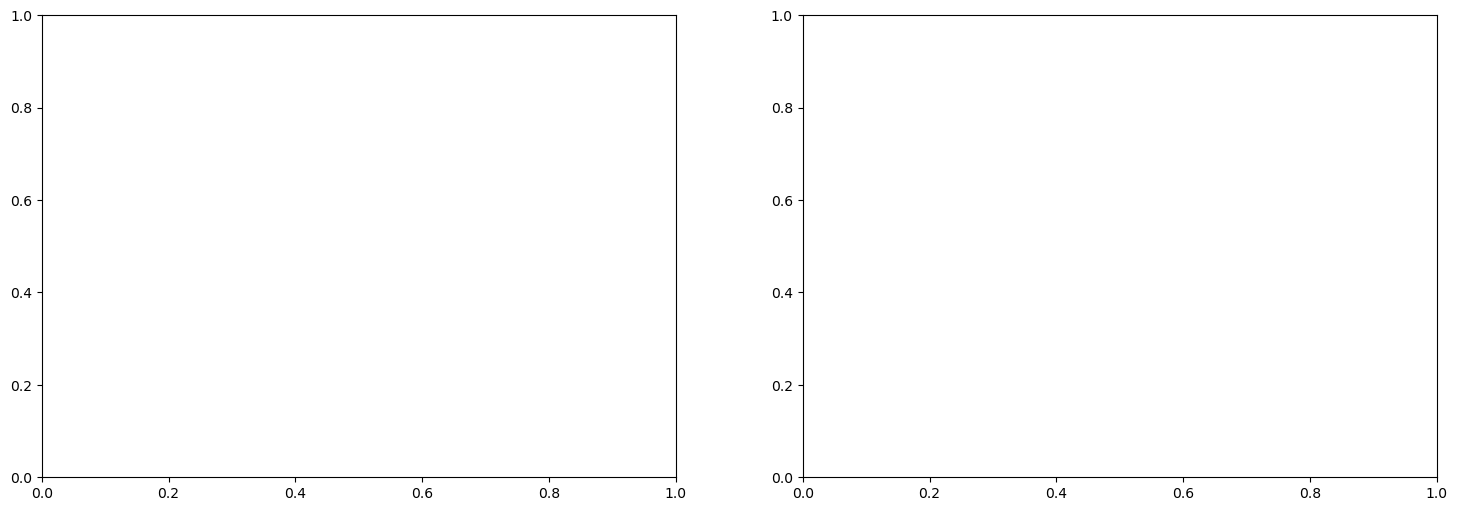

In [ ]:
# Create a side-by-side comparison of sycophancy scores
# Left plot: Overall sycophancy score by category for each language variant
# Right plot: Average of regressive, validation, and framing components by category for each language variant
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Iterate over each unique language variant
for language_variant in df['language_variant'].unique():
    # Filter data for the current language variant
    subset = df[df['language_variant'] == language_variant]
    
    # Calculate mean overall sycophancy score per category
    means_overall = subset.groupby('category')['overall'].mean()
    # Plot on the left subplot
    axs[0].plot(means_overall.index, means_overall.values, marker='o', label=language_variant)
    
    # Calculate mean of the three components (regressive, validation, framing) per category
    means_components = subset.groupby('category')[['regressive', 'validation', 'framing']].mean().mean(axis=1)
    # Plot on the right subplot
    axs[1].plot(means_components.index, means_components.values, marker='o', label=language_variant)

# Configure left subplot
axs[0].set_title(f'Overall Sycophancy by Language Variant for gemma')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Average Overall Sycophancy Score')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

# Configure right subplot
axs[1].set_title(f'Average Sycophancy Components by Language Variant for gemma')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Average Sycophancy Score')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Categories for the axes
categories = agg_df['category'].unique()
N = len(categories)

# Angles for each category
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # close the loop

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# One polygon per language variant
for language_variant in agg_df['language_variant'].unique():
    subset = agg_df[agg_df['language_variant'] == language_variant]
    
    # Mean overall sycophancy per category, in a fixed category order
    means_overall = subset.groupby('category')['overall'].mean().reindex(categories)
    values = means_overall.values
    values = np.concatenate((values, [values[0]]))  # close the polygon
    
    ax.plot(angles, values, marker='o', label=language_variant)
    ax.fill(angles, values, alpha=0.1)

# Category labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45, ha='right')

ax.set_title(f'Overall sycophancy (radar chart) - {model_evaluated}')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()
